# t-sne 觀察 : 流形還原

# [作業目標]
- 試著模仿範例寫法, 觀察 S 形使用 t-SNE , 在不同困惑度 (perplexity) 下的流形還原效果

# [作業重點]
- 使用 S 形資料集, 觀察 t-sne 在困惑度 (perplexity) 有所不同時, 流形還原的效果如何變化 (In[4], Out[4])
- Hint : ax.scatter(Y[red, 0], Y[red, 1], c="r") 與 ax.scatter(Y[green, 0], Y[green, 1], c="g") 兩行改一行 ax.scatter(Y[:, 0], Y[:, 1], c=color)

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
#(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]

# 設定S曲線資料點
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)

# 作業
* 將原始資料集換為S型圖, 觀察不同 perplexity 下的流形還原結果

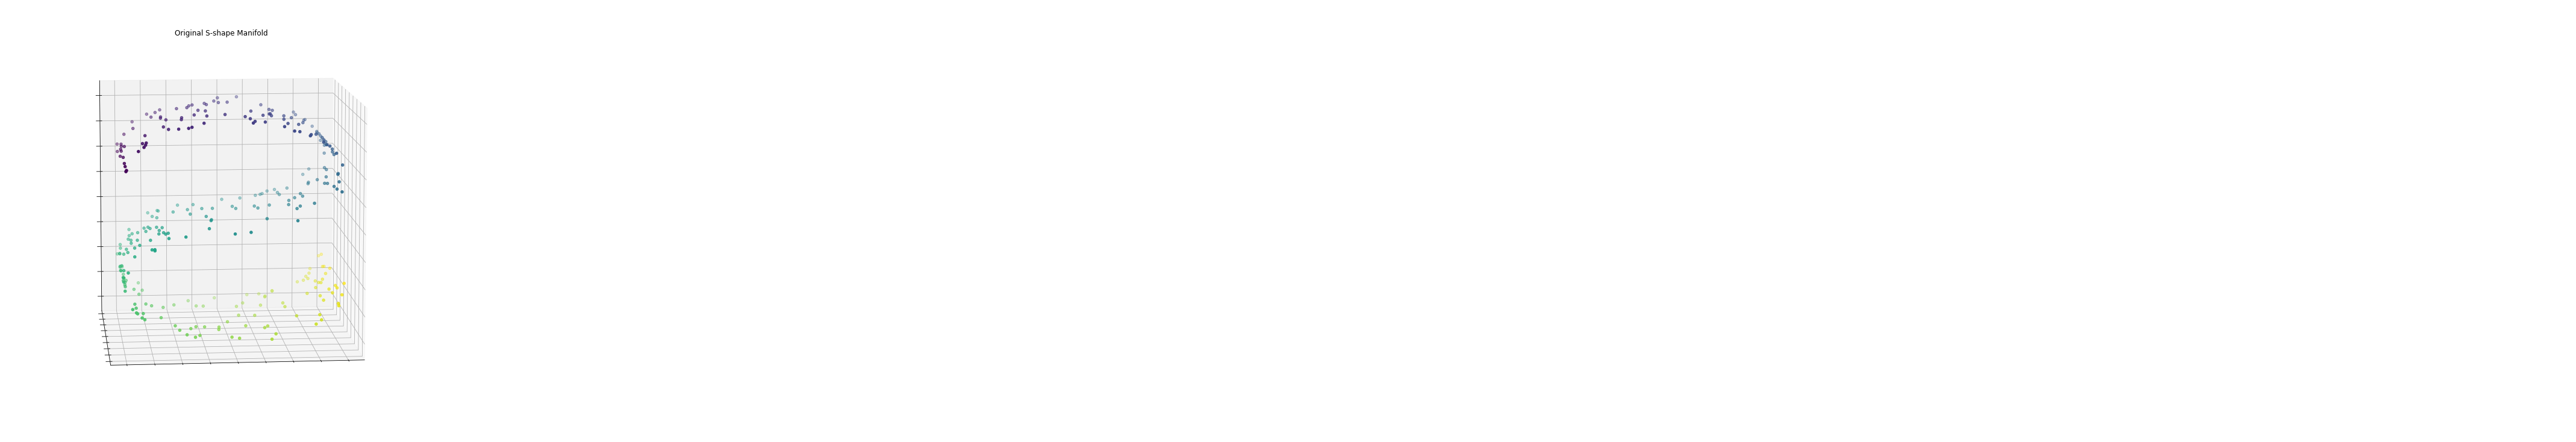

In [3]:
#fig, ax = plt.subplots(3, 3, figsize=[10, 10])
fig = plt.figure(figsize=(10, 10))
def cubic_drawing(X, color, fig, azim = 85, elev=10):
    ax_3d = Axes3D(fig, azim=azim, elev=elev)
    ax_3d.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=color)
    ax_3d.w_xaxis.set_ticklabels([])
    ax_3d.w_yaxis.set_ticklabels([])
    ax_3d.w_zaxis.set_ticklabels([])
    ax_3d.set_title('Original S-shape Manifold')
    return ax_3d
ax_check = cubic_drawing(X, color, fig, azim = 85, elev=10)
plt.show()

In [4]:
# 繪製不同 perplexity 下的 t-SNE 流形還原圖 (請注意! 語法也要對應調整)
from sklearn.manifold import TSNE
def tsne_observation(X, color, perplexities):
   
    #original data drawing
    fig0 = plt.figure()
    ax_cubic = cubic_drawing(X, color, fig0)
    #tsne drawing
    fig, ax = plt.subplots(2, 5)
    ax = ax.reshape(-1)
    ax[0].scatter(X[:, 0], X[:, 2], c=color)
    ax[0].xaxis.set_major_formatter(NullFormatter())
    ax[0].yaxis.set_major_formatter(NullFormatter())
    ax[0].set_title('Original \nS-shape Manifold')
    perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]
    for idx, p in enumerate(perplexities):
        print('tsne perplexities {}:'.format(p))
        start = time()
        tsne = TSNE(n_components=2, perplexity=p)
        Y = tsne.fit_transform(X)
        time_consuming = time() -start
        print('time_consuming:{}'.format(round(time_consuming, 2)))
        ax[idx+1].scatter(Y[:, 0], Y[:, 1], c=color)
        ax[idx+1].xaxis.set_major_formatter(NullFormatter())
        ax[idx+1].yaxis.set_major_formatter(NullFormatter())
        ax[idx+1].set_title('tsne_perplexities:{}\ntime consuming:{:.2}'.format(p, time_consuming))
    return (fig0, ax_cubic,fig, ax)

tsne perplexities 4:
time_consuming:1.58
tsne perplexities 6:
time_consuming:1.91
tsne perplexities 9:
time_consuming:1.92
tsne perplexities 14:
time_consuming:1.98
tsne perplexities 21:
time_consuming:2.07
tsne perplexities 30:
time_consuming:2.11
tsne perplexities 45:
time_consuming:2.22
tsne perplexities 66:
time_consuming:1.95
tsne perplexities 100:
time_consuming:3.12


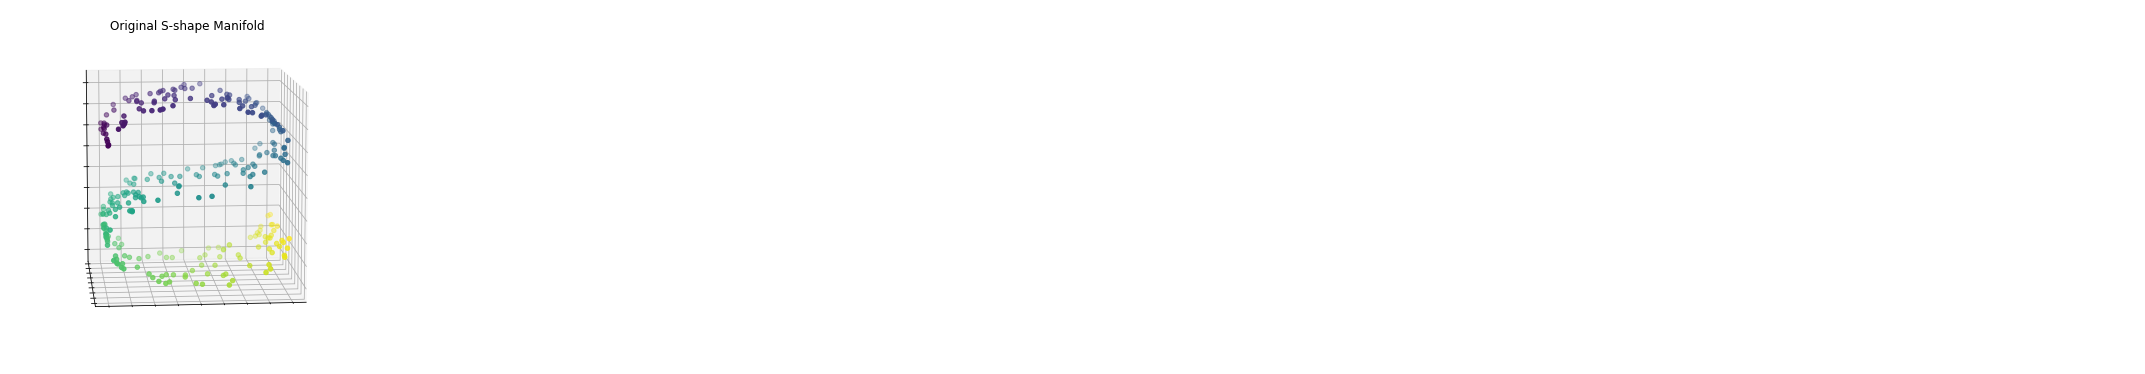

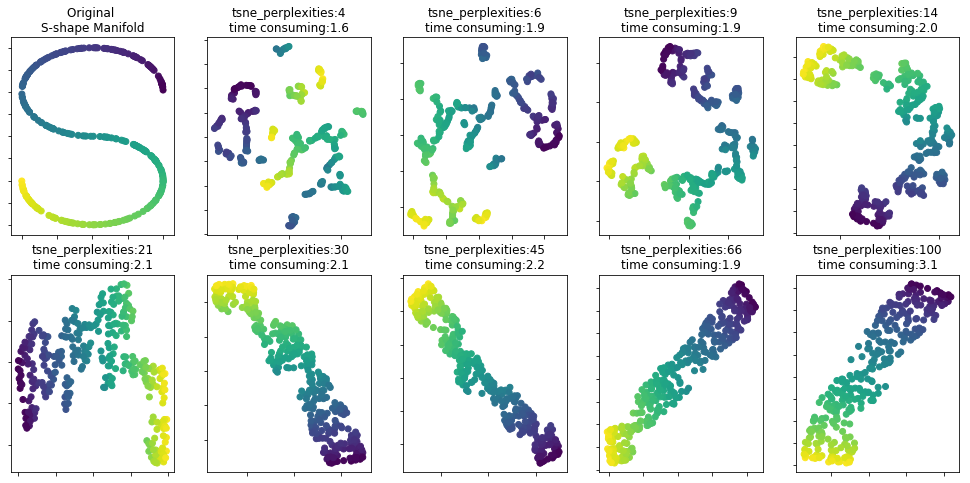

In [5]:
(fig_ori, ax_3d, fig_result, ax_result) = tsne_observation(X, color, perplexities)
fig_result.set_figheight(8), fig_result.set_figwidth(17)
fig_ori.set_figheight(5), fig_ori.set_figwidth(5)
plt.show()